In [397]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorflow import keras
import os
import datetime

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [398]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [399]:
file = '2013~2023 한국 기온,습도,풍속.csv'

In [400]:
df = pd.read_csv(file, encoding = 'cp949')

In [401]:
df

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
0,105,강릉,2013-01-01,-1.9,3.8,-6.7,50.6,2.9
1,105,강릉,2013-01-02,-6.0,-1.3,-9.9,29.9,4.4
2,105,강릉,2013-01-03,-7.5,-0.7,-11.1,25.8,4.0
3,105,강릉,2013-01-04,-4.9,1.8,-10.6,31.1,3.2
4,105,강릉,2013-01-05,-1.7,2.8,-5.4,30.4,4.3
...,...,...,...,...,...,...,...,...
62059,184,제주,2023-08-11,29.6,34.1,26.6,64.6,4.0
62060,184,제주,2023-08-12,29.7,33.3,27.2,66.6,2.7
62061,184,제주,2023-08-13,29.2,32.6,26.3,65.3,3.0
62062,184,제주,2023-08-14,28.9,32.3,26.4,69.9,3.4


In [402]:
df_korea = df.drop(['지점번호', '지점명'], axis = 1).groupby(['일시']).mean()
df_korea.head(10)

,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
일시,,,,,
2013-01-01,-0.76250,4.43750,-6.21250,73.10000,2.33125
2013-01-02,-4.70000,0.54375,-8.98125,53.29375,3.58750
2013-01-03,-8.09375,-3.99375,-11.26250,48.90000,3.40625
2013-01-04,-6.74375,-1.15000,-11.61875,50.25000,2.03125
2013-01-05,-3.81250,1.75625,-9.41875,57.06250,2.28125
2013-01-06,-2.32500,2.52500,-5.73750,57.04375,1.96875
2013-01-07,-2.00625,3.35000,-6.72500,49.62500,1.95000
2013-01-08,-1.22500,3.76875,-5.28750,50.66250,2.15625
2013-01-09,-4.01875,-0.80625,-7.14375,45.38125,3.41250


In [403]:
df_korea.tail(10)

,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
일시,,,,,
2023-08-06,29.40625,33.70000,26.15625,74.78750,1.95000
2023-08-07,29.28750,33.62500,26.05625,74.49375,2.43750
2023-08-08,29.08125,33.11875,25.81875,71.57500,2.92500
2023-08-09,26.48125,28.96250,24.30625,81.06250,3.91875
2023-08-10,23.74375,25.91875,22.36875,88.73125,4.73125
2023-08-11,26.24375,29.97500,22.85625,79.02500,2.83750
2023-08-12,25.86250,29.23125,23.14375,81.25000,1.88125
2023-08-13,26.88750,31.00625,23.51875,77.77500,1.60000
2023-08-14,27.40000,31.66250,24.34375,77.50000,1.77500


In [404]:
df_korea.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3879 entries, 2013-01-01 to 2023-08-15
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   평균기온(℃)    3879 non-null   float64
 1   최고기온(℃)    3879 non-null   float64
 2   최저기온(℃)    3879 non-null   float64
 3   평균습도(%rh)  3879 non-null   float64
 4   평균풍속(m/s)  3879 non-null   float64
dtypes: float64(5)
memory usage: 181.8+ KB


In [405]:
df_korea.tail()

,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
일시,,,,,
2023-08-11,26.24375,29.97500,22.85625,79.0250,2.83750
2023-08-12,25.86250,29.23125,23.14375,81.2500,1.88125
2023-08-13,26.88750,31.00625,23.51875,77.7750,1.60000
2023-08-14,27.40000,31.66250,24.34375,77.5000,1.77500
2023-08-15,27.23750,31.21250,24.21250,76.5875,2.12500


In [406]:
df_korea = df_korea.reset_index()

In [407]:
df_korea['일시']  = pd.to_datetime(df_korea['일시'])
df_korea.set_index('일시', inplace = True)

Text(0.5, 1.0, '10년간 일별 평균기온')

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


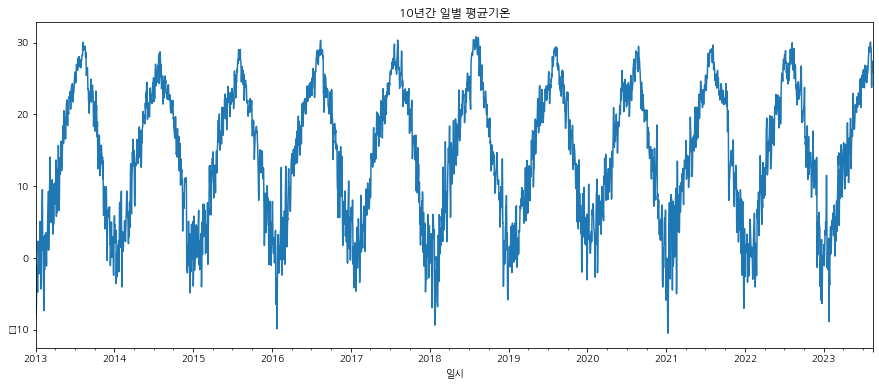

In [408]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['평균기온(℃)'].plot()
axe.set_title('10년간 일별 평균기온')

Text(0.5, 1.0, '10년간 일별 최저기온')

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


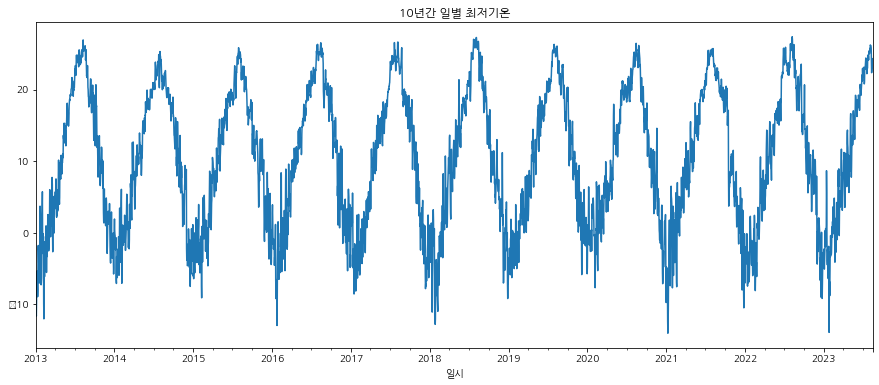

In [409]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['최저기온(℃)'].plot()
axe.set_title('10년간 일별 최저기온')
# 겨울의 병원균을 옮기는 곤충, 동물, 조류들이 동면이 가능한지 보기위한 columns

Text(0.5, 1.0, '10년간 일별 평균습도')

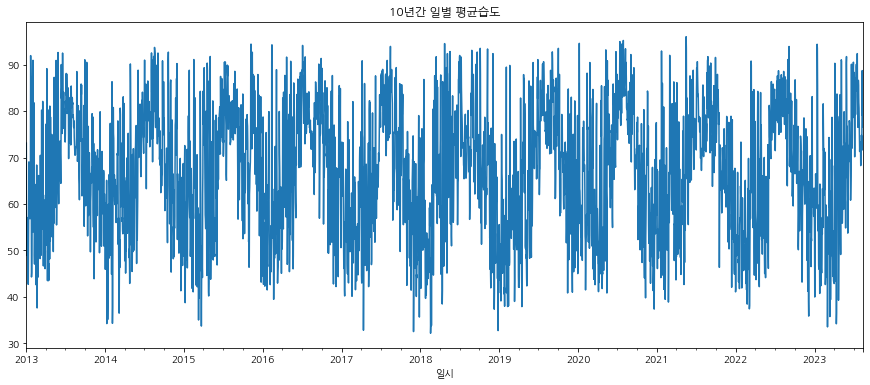

In [410]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['평균습도(%rh)'].plot()
axe.set_title('10년간 일별 평균습도')

Text(0.5, 1.0, '10년간 일별 평균풍속')

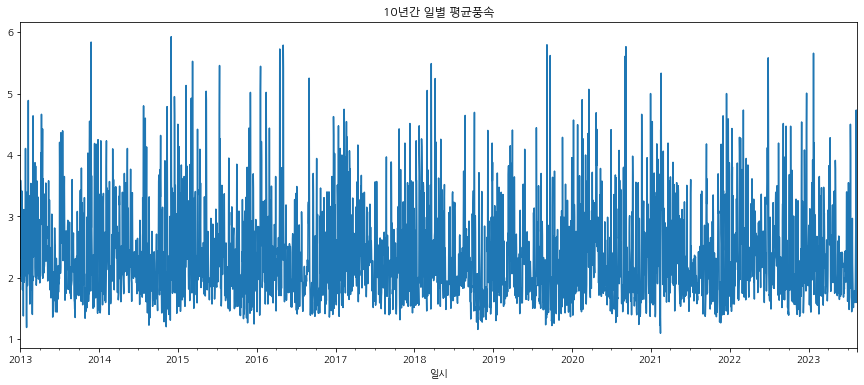

In [411]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['평균풍속(m/s)'].plot()
axe.set_title('10년간 일별 평균풍속')

## Data Processing

In [412]:
n_col = 1
dataset = df_korea['평균기온(℃)']
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(3879, 1)

In [413]:
scaler = MinMaxScaler(feature_range = (0 , 1))
scaled_data = scaler.fit_transform(np.array(data))

## Splitting Data

In [414]:
train_size = int(len(data)*0.75)
test_size = len(data) - train_size
print('Train Size :', train_size, 'Test Size : ', test_size)

Train Size : 2909 Test Size :  970


In [415]:
dataset.iloc[0:train_size, :]

,평균기온(℃)
일시,
2013-01-01,-0.76250
2013-01-02,-4.70000
2013-01-03,-8.09375
2013-01-04,-6.74375
2013-01-05,-3.81250
...,...
2020-12-14,-3.10000
2020-12-15,-4.07500
2020-12-16,-3.58125


In [416]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(2909, 1)

## Creating Data Set

In [417]:
x_train = []
y_train = []
time_step = 1825
n_col = 1

for i in range(time_step, len(scaled_data)):
    print(time_step, i)
    x_train.append(scaled_data[i-time_step:i, :n_col])
    y_train.append(scaled_data[i, :n_col])
    if i <= time_step:
        print('x_train : ', x_train)
        print('y_train : ', y_train)

1825 1825
x_train :  [array([[0.23578342],
       [0.14050212],
       [0.05837871],
       ...,
       [0.26246219],
       [0.3554144 ],
       [0.36327889]])]
y_train :  [array([0.33000605])]
1825 1826
1825 1827
1825 1828
1825 1829
1825 1830
1825 1831
1825 1832
1825 1833
1825 1834
1825 1835
1825 1836
1825 1837
1825 1838
1825 1839
1825 1840
1825 1841
1825 1842
1825 1843
1825 1844
1825 1845
1825 1846
1825 1847
1825 1848
1825 1849
1825 1850
1825 1851
1825 1852
1825 1853
1825 1854
1825 1855
1825 1856
1825 1857
1825 1858
1825 1859
1825 1860
1825 1861
1825 1862
1825 1863
1825 1864
1825 1865
1825 1866
1825 1867
1825 1868
1825 1869
1825 1870
1825 1871
1825 1872
1825 1873
1825 1874
1825 1875
1825 1876
1825 1877
1825 1878
1825 1879
1825 1880
1825 1881
1825 1882
1825 1883
1825 1884
1825 1885
1825 1886
1825 1887
1825 1888
1825 1889
1825 1890
1825 1891
1825 1892
1825 1893
1825 1894
1825 1895
1825 1896
1825 1897
1825 1898
1825 1899
1825 1900
1825 1901
1825 1902
1825 1903
1825 1904
1825 1905
1825 

In [418]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [419]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_col))

In [420]:
x_train.shape, y_train.shape

((2054, 1825, 1), (2054, 1))

In [421]:
m_lstm = keras.Sequential([
    keras.layers.LSTM(64, input_shape=(x_train.shape[1], n_col),
                       activation = 'relu',return_sequences = True),
    keras.layers.LSTM(64, return_sequences = False, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(1)
])
m_lstm.summary()
#kernel_regularizer="l2"

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_29 (LSTM)              (None, 1825, 64)          16896     
                                                                 
 lstm_30 (LSTM)              (None, 64)                33024     
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 dense_37 (Dense)            (None, 16)                528       
                                                                 
 dense_38 (Dense)            (None, 1)                 17        
                                                                 
Total params: 52,545
Trainable params: 52,545
Non-trainable params: 0
_________________________________________________________________


In [422]:
m_lstm.compile(optimizer = tf.optimizers.RMSprop(learning_rate = 0.001),
             loss = keras.losses.MeanSquaredError(),
             metrics = ['mae'])

In [423]:
h = m_lstm.fit(x_train, y_train, epochs = 10, shuffle=False, batch_size = 64)

Epoch 1/10
33/33 [==============================] - 27s 770ms/step - loss: 0.0550 - mae: 0.1665
Epoch 2/10
33/33 [==============================] - 25s 764ms/step - loss: 0.0139 - mae: 0.0985
Epoch 3/10
33/33 [==============================] - 25s 764ms/step - loss: 0.0131 - mae: 0.0948
Epoch 4/10
33/33 [==============================] - 25s 765ms/step - loss: 0.0119 - mae: 0.0897
Epoch 5/10
33/33 [==============================] - 25s 770ms/step - loss: 0.0106 - mae: 0.0839
Epoch 6/10
33/33 [==============================] - 25s 771ms/step - loss: 0.0097 - mae: 0.0798
Epoch 7/10
33/33 [==============================] - 25s 766ms/step - loss: 0.0091 - mae: 0.0766
Epoch 8/10
33/33 [==============================] - 25s 766ms/step - loss: 0.0085 - mae: 0.0737
Epoch 9/10
33/33 [==============================] - 26s 775ms/step - loss: 0.0081 - mae: 0.0715
Epoch 10/10
33/33 [==============================] - 25s 767ms/step - loss: 0.0078 - mae: 0.0698


In [424]:
m_lstm.save('m3_lstm_adam.h5')

In [425]:
m_lstm_Adam = tf.keras.models.load_model('m3_lstm_adam.h5')

Text(0, 0.5, 'Losses')

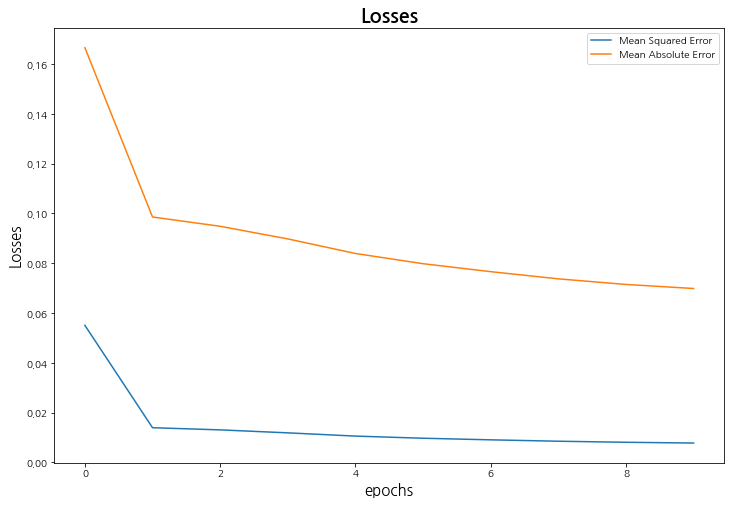

In [426]:
fig, axe = plt.subplots(figsize = (12, 8))
axe.plot(h.history['loss'])
axe.plot(h.history['mae'])
axe.legend(['Mean Squared Error', 'Mean Absolute Error'])
axe.set_title('Losses', size = 20, weight = 'bold')
axe.set_xlabel('epochs', size = 15)
axe.set_ylabel('Losses', size = 15)

In [439]:
len(test_data)

2795

In [428]:
test_data = scaled_data[train_size - time_step:, :]

x_test = []
y_test = []

for i in range(time_step, len(test_data)):
    print(time_step, i)
    x_test.append(test_data[i-time_step:i, 0:n_col])
    y_test.append(test_data[i, 0:n_col])
    
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_col))



1825 1825
1825 1826
1825 1827
1825 1828
1825 1829
1825 1830
1825 1831
1825 1832
1825 1833
1825 1834
1825 1835
1825 1836
1825 1837
1825 1838
1825 1839
1825 1840
1825 1841
1825 1842
1825 1843
1825 1844
1825 1845
1825 1846
1825 1847
1825 1848
1825 1849
1825 1850
1825 1851
1825 1852
1825 1853
1825 1854
1825 1855
1825 1856
1825 1857
1825 1858
1825 1859
1825 1860
1825 1861
1825 1862
1825 1863
1825 1864
1825 1865
1825 1866
1825 1867
1825 1868
1825 1869
1825 1870
1825 1871
1825 1872
1825 1873
1825 1874
1825 1875
1825 1876
1825 1877
1825 1878
1825 1879
1825 1880
1825 1881
1825 1882
1825 1883
1825 1884
1825 1885
1825 1886
1825 1887
1825 1888
1825 1889
1825 1890
1825 1891
1825 1892
1825 1893
1825 1894
1825 1895
1825 1896
1825 1897
1825 1898
1825 1899
1825 1900
1825 1901
1825 1902
1825 1903
1825 1904
1825 1905
1825 1906
1825 1907
1825 1908
1825 1909
1825 1910
1825 1911
1825 1912
1825 1913
1825 1914
1825 1915
1825 1916
1825 1917
1825 1918
1825 1919
1825 1920
1825 1921
1825 1922
1825 1923
1825 1924


In [429]:
m_lstm_Adam.evaluate(x_test, y_test)

31/31 [==============================] - 5s 159ms/step - loss: 0.0122 - mae: 0.0930


[0.012209277600049973, 0.09302611649036407]

In [430]:
pred = m_lstm_Adam.predict(x_test)

31/31 [==============================] - 5s 160ms/step


In [431]:
pred.shape

(970, 1)

In [432]:
pred = scaler.inverse_transform(pred)
pred.shape

(970, 1)

In [433]:
y_test = scaler.inverse_transform(y_test)

In [434]:
df_pred = pd.DataFrame(data = 
                       {'predict' : pred.flatten(),
                       'actual' : y_test.flatten()})
df_pred

,predict,actual
0,3.118593,-1.42500
1,2.742367,-0.21250
2,2.462166,1.47500
3,2.335355,3.38125
4,2.398767,5.05000
...,...,...
965,21.731300,26.24375
966,21.484303,25.86250
967,21.234060,26.88750
968,21.037985,27.40000


/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


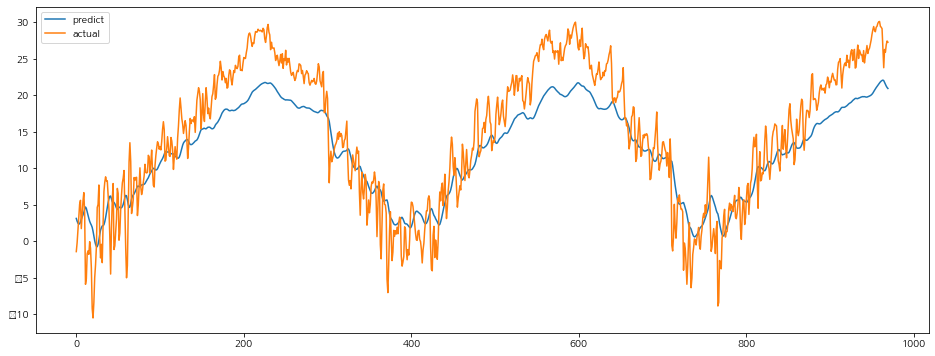

In [435]:
fig, axe = plt.subplots(figsize = (16, 6))
axe.plot(df_pred['predict'])
axe.plot(df_pred['actual'])
axe.legend(['predict', 'actual'])

In [436]:
start_date = datetime.date(2023, 8, 16)
#print('언제의 대한민국 평균 기온을 알고 싶으신가요? (Ex. 2040-01-01, 형태로 적어주세요)')
year, month, day = map(int, input().split('-'))
target_date = datetime.date(year, month, day)

d_day = (target_date - start_date).days
print(d_day)

2028-08-15
1826


In [437]:
last_array = []
for i in range(len(x_test[-1])):
    last_array.append(x_test[-1].flatten()[i])
    
len(last_array)

1825

In [438]:
for i in range(time_step, d_day+time_step):
    print(time_step, i)
    last_ar = np.array(last_array[i-time_step:i])
    print(last_ar)
    array = np.reshape(last_ar, (n_col, last_ar.shape[0], n_col))
    print(array.shape)
    last_array.append(m_lstm_Adam.predict(array)[0,0])
    print(len(last_array))

1825 1825
[0.92937084 0.88369631 0.86766485 ... 0.88006655 0.90486993 0.91727163]
(1, 1825, 1)
1/1 [==============================] - 0s 80ms/step
1826
1825 1826
[0.88369631 0.86766485 0.88702359 ... 0.90486993 0.91727163 0.76013583]
(1, 1825, 1)
1/1 [==============================] - 0s 78ms/step
1827
1825 1827
[0.86766485 0.88702359 0.91107078 ... 0.91727163 0.76013583 0.75191212]
(1, 1825, 1)
1/1 [==============================] - 0s 77ms/step
1828
1825 1828
[0.88702359 0.91107078 0.91727163 ... 0.76013583 0.75191212 0.74094367]
(1, 1825, 1)
1/1 [==============================] - 0s 77ms/step
1829
1825 1829
[0.91107078 0.91727163 0.9676346  ... 0.75191212 0.74094367 0.72846258]
(1, 1825, 1)
1/1 [==============================] - 0s 77ms/step
1830
1825 1830
[0.91727163 0.9676346  0.92710224 ... 0.74094367 0.72846258 0.71530038]
(1, 1825, 1)
1/1 [==============================] - 0s 77ms/step
1831
1825 1831
[0.9676346  0.92710224 0.88626739 ... 0.72846258 0.71530038 0.70200157]
(1, 18

1/1 [==============================] - 0s 87ms/step
1879
1825 1879
[0.64927405 0.61479129 0.54839685 ... 0.48559594 0.48489451 0.4842391 ]
(1, 1825, 1)
1/1 [==============================] - 0s 97ms/step
1880
1825 1880
[0.61479129 0.54839685 0.54733817 ... 0.48489451 0.4842391  0.48362669]
(1, 1825, 1)
1/1 [==============================] - 0s 82ms/step
1881
1825 1881
[0.54839685 0.54733817 0.58242589 ... 0.4842391  0.48362669 0.48305452]
(1, 1825, 1)
1/1 [==============================] - 0s 89ms/step
1882
1825 1882
[0.54733817 0.58242589 0.61116152 ... 0.48362669 0.48305452 0.48251987]
(1, 1825, 1)
1/1 [==============================] - 0s 77ms/step
1883
1825 1883
[0.58242589 0.61116152 0.63520871 ... 0.48305452 0.48251987 0.48202026]
(1, 1825, 1)
1/1 [==============================] - 0s 78ms/step
1884
1825 1884
[0.61116152 0.63520871 0.60647308 ... 0.48251987 0.48202026 0.48155347]
(1, 1825, 1)
1/1 [==============================] - 0s 84ms/step
1885
1825 1885
[0.63520871 0.6064730

1/1 [==============================] - 0s 84ms/step
1933
1825 1933
[0.51149425 0.58802178 0.51603146 ... 0.47517657 0.47515857 0.47514176]
(1, 1825, 1)
1/1 [==============================] - 0s 79ms/step
1934
1825 1934
[0.58802178 0.51603146 0.37099214 ... 0.47515857 0.47514176 0.475126  ]
(1, 1825, 1)
1/1 [==============================] - 0s 83ms/step
1935
1825 1935
[0.51603146 0.37099214 0.3715971  ... 0.47514176 0.475126   0.47511131]
(1, 1825, 1)
1/1 [==============================] - 0s 81ms/step
1936
1825 1936
[0.37099214 0.3715971  0.20266183 ... 0.475126   0.47511131 0.47509751]
(1, 1825, 1)
1/1 [==============================] - 0s 80ms/step
1937
1825 1937
[0.3715971  0.20266183 0.15819722 ... 0.47511131 0.47509751 0.47508472]
(1, 1825, 1)
1/1 [==============================] - 0s 83ms/step
1938
1825 1938
[0.20266183 0.15819722 0.18012704 ... 0.47509751 0.47508472 0.47507274]
(1, 1825, 1)
1/1 [==============================] - 0s 85ms/step
1939
1825 1939
[0.15819722 0.1801270

1/1 [==============================] - 0s 86ms/step
1987
1825 1987
[0.28221416 0.23971567 0.28750756 ... 0.47490841 0.47490796 0.47490752]
(1, 1825, 1)
1/1 [==============================] - 0s 88ms/step
1988
1825 1988
[0.23971567 0.28750756 0.33756806 ... 0.47490796 0.47490752 0.47490713]
(1, 1825, 1)
1/1 [==============================] - 0s 94ms/step
1989
1825 1989
[0.28750756 0.33756806 0.3015729  ... 0.47490752 0.47490713 0.47490677]
(1, 1825, 1)
1/1 [==============================] - 0s 96ms/step
1990
1825 1990
[0.33756806 0.3015729  0.37114338 ... 0.47490713 0.47490677 0.47490638]
(1, 1825, 1)
1/1 [==============================] - 0s 89ms/step
1991
1825 1991
[0.3015729  0.37114338 0.27601331 ... 0.47490677 0.47490638 0.47490609]
(1, 1825, 1)
1/1 [==============================] - 0s 92ms/step
1992
1825 1992
[0.37114338 0.27601331 0.2492438  ... 0.47490638 0.47490609 0.47490573]
(1, 1825, 1)
1/1 [==============================] - 0s 87ms/step
1993
1825 1993
[0.27601331 0.2492438

1/1 [==============================] - 0s 84ms/step
2041
1825 2041
[0.55807623 0.50816697 0.39897157 ... 0.47490156 0.47490156 0.47490156]
(1, 1825, 1)
1/1 [==============================] - 0s 79ms/step
2042
1825 2042
[0.50816697 0.39897157 0.37870538 ... 0.47490156 0.47490156 0.47490156]
(1, 1825, 1)
1/1 [==============================] - 0s 77ms/step
2043
1825 2043
[0.39897157 0.37870538 0.3915608  ... 0.47490156 0.47490156 0.47490156]
(1, 1825, 1)
1/1 [==============================] - 0s 77ms/step
2044
1825 2044
[0.37870538 0.3915608  0.45765275 ... 0.47490156 0.47490156 0.47490156]
(1, 1825, 1)
1/1 [==============================] - 0s 81ms/step
2045
1825 2045
[0.3915608  0.45765275 0.54189353 ... 0.47490156 0.47490156 0.47490156]
(1, 1825, 1)
1/1 [==============================] - 0s 104ms/step
2046
1825 2046
[0.45765275 0.54189353 0.58272837 ... 0.47490156 0.47490156 0.47490156]
(1, 1825, 1)
1/1 [==============================] - 0s 88ms/step
2047
1825 2047
[0.54189353 0.582728

1/1 [==============================] - 0s 76ms/step
2095
1825 2095
[0.6976709  0.74092559 0.76194797 ... 0.47490156 0.47490156 0.47490156]
(1, 1825, 1)
1/1 [==============================] - 0s 79ms/step
2096
1825 2096
[0.74092559 0.76194797 0.79083485 ... 0.47490156 0.47490156 0.47490156]
(1, 1825, 1)
1/1 [==============================] - 0s 87ms/step
2097
1825 2097
[0.76194797 0.79083485 0.78750756 ... 0.47490156 0.47490156 0.47490156]
(1, 1825, 1)
1/1 [==============================] - 0s 93ms/step
2098
1825 2098
[0.79083485 0.78750756 0.72489413 ... 0.47490156 0.47490156 0.47490156]
(1, 1825, 1)
1/1 [==============================] - 0s 88ms/step
2099
1825 2099
[0.78750756 0.72489413 0.73835451 ... 0.47490156 0.47490156 0.47490156]
(1, 1825, 1)
1/1 [==============================] - 0s 85ms/step
2100
1825 2100
[0.72489413 0.73835451 0.67574108 ... 0.47490156 0.47490156 0.47490156]
(1, 1825, 1)
1/1 [==============================] - 0s 85ms/step
2101
1825 2101
[0.73835451 0.6757410

1/1 [==============================] - 0s 85ms/step
2149
1825 2149
[0.88203267 0.84240774 0.81941924 ... 0.47490156 0.47490156 0.47490156]
(1, 1825, 1)
1/1 [==============================] - 0s 89ms/step
2150
1825 2150
[0.84240774 0.81941924 0.82032668 ... 0.47490156 0.47490156 0.47490156]
(1, 1825, 1)
1/1 [==============================] - 0s 87ms/step
2151
1825 2151
[0.81941924 0.82032668 0.77419843 ... 0.47490156 0.47490156 0.47490156]
(1, 1825, 1)
1/1 [==============================] - 0s 87ms/step
2152
1825 2152
[0.82032668 0.77419843 0.79945554 ... 0.47490156 0.47490156 0.47490156]
(1, 1825, 1)
1/1 [==============================] - 0s 85ms/step
2153
1825 2153
[0.77419843 0.79945554 0.82486388 ... 0.47490156 0.47490156 0.47490156]
(1, 1825, 1)
1/1 [==============================] - 0s 87ms/step
2154
1825 2154
[0.79945554 0.82486388 0.82062916 ... 0.47490156 0.47490156 0.47490156]
(1, 1825, 1)
1/1 [==============================] - 0s 87ms/step
2155
1825 2155
[0.82486388 0.8206291

1/1 [==============================] - 0s 83ms/step
2203
1825 2203
[0.81609195 0.83030853 0.82743497 ... 0.47490156 0.47490156 0.47490156]
(1, 1825, 1)
1/1 [==============================] - 0s 78ms/step
2204
1825 2204
[0.83030853 0.82743497 0.81200847 ... 0.47490156 0.47490156 0.47490156]
(1, 1825, 1)
1/1 [==============================] - 0s 78ms/step
2205
1825 2205
[0.82743497 0.81200847 0.79945554 ... 0.47490156 0.47490156 0.47490156]
(1, 1825, 1)
1/1 [==============================] - 0s 82ms/step
2206
1825 2206
[0.81200847 0.79945554 0.80777374 ... 0.47490156 0.47490156 0.47490156]
(1, 1825, 1)
1/1 [==============================] - 0s 84ms/step
2207
1825 2207
[0.79945554 0.80777374 0.83151845 ... 0.47490156 0.47490156 0.47490156]
(1, 1825, 1)
1/1 [==============================] - 0s 89ms/step
2208
1825 2208
[0.80777374 0.83151845 0.85193587 ... 0.47490156 0.47490156 0.47490156]
(1, 1825, 1)
1/1 [==============================] - 0s 83ms/step
2209
1825 2209
[0.83151845 0.8519358

KeyboardInterrupt: 

In [394]:
test_pred = np.array(last_array).reshape(len(last_array),1)

In [395]:
len(test_pred)

425

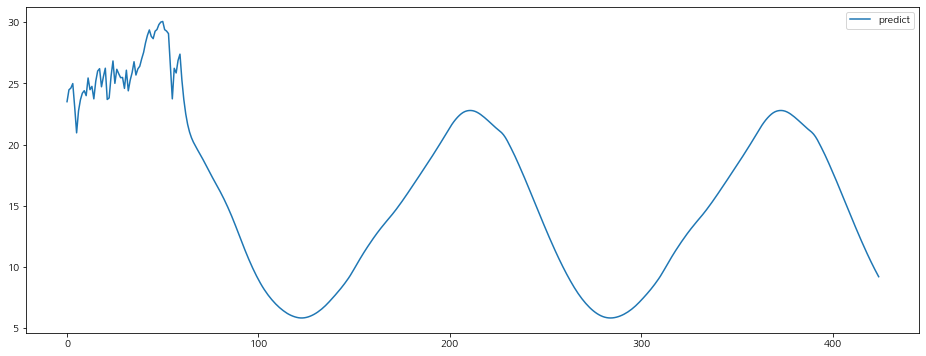

In [396]:
fig, axe = plt.subplots(figsize = (16, 6))
#axe.plot(df_pred['actual'])
axe.plot(scaler.inverse_transform(test_pred))
axe.legend(['predict', 'actual'])